# FOSDEM'24 - A Murder Party with Lea
<center> <span style="font-size:18px">February 4, 2024</span><br>
<center> <span style="font-size:18px">by Pierre Denis</span>

## Intro: the murder...

*It was a dark, foggy night. All the occupants of Randominion Manor were sleeping peacefully. Suddenly, around 3 a.m., a horrible scream arose. Shortly after, **Dr. Black** is found dead in the living room. After examining the body, one discovers, clutched in the doctor's left hand, two red dice.*
<center><img src="red_dice.jpg"/></center>

***Lea**, the private investigator, watches the crime scene and whispers:<br> "Mmmh... Two dice... Die+Die... Is it a rebus"?*

Four suspects have been identified, with some probabilities to be the killer:

|![](ColMustard.jpg)     | ![](MrsPeacock.jpg) | ![](MrsWhite.jpg) | ![Plum](ProfPlum.jpg) |
|:------------------------:|:---------------------:|:-------------------:|:-----------------------:|
| Colonel Mustard: **40%**  | Mrs. Peacock: **25%**   | Mrs. White: **10%**   | Professor Plum: **25%**   |


After first inquiries, **Sigmund-the-profiler** declares:

> ***if** Mrs. White is the killer, <br> 
**then** she'll be absent with prob. 95 %,<br>
**otherwise** she'll be absent with prob. 20 %*
<hr>

> ***if** Mrs. Peacock is innocent,<br>
**then** she knows who's the killer with prob. 75 %*
<hr>

> ***if** Mrs. Peacock is the killer **or if** she knows who’s the killer<br>
**then** she'll be drunk with prob. 50 %,<br>
**otherwise** she'll be drunk with prob. 10 %*
<hr>

> ***if** Col. Mustard is the killer, <br> 
**then** Prof. Plum will accuse him with prob. 75 %,<br>
**otherwise** Prof. Plum will accuse him with prob. 5 %*
<hr>
How can Lea use all these uncertain information?<br>
What if Mrs. Peacok is drunk?...

## Let's meet Lea...

[**Lea**](https://bitbucket.org/piedenis/lea), in a nutshell:

* discrete probability distributions, on any Python objects
* open to various probability representations, e.g. float, fractions and symbols
* Bayesian reasonning and Probabilistic Programming (PP)
* new *exact* algorithm, based on Python's generators (["Statues algorithm"](https://arxiv.org/abs/1806.09997))
* lightweight Python module (optional sympy, pandas, numpy, matplotlib modules for advanced functions)
* open source LGPL

|           | latest Lea version  | requires           |
|-----------|---------------------|--------------------|
|**Lea 3**  | v3.4.6 (EOL)        | Python 2.6+ / 3.x |
|**Lea 4**  | v4.0.0              | Python 3.8+        |

To install Lea 4:<br>
`pip install lea`

or execute the following in your Jupyter Notebook (remove the `#` to comment out):

In [1]:
# !pip install lea

Install few other optional packages, for some advanced functions:

In [2]:
# --- to plot histograms --------------
# !pip install matplotlib       
# --- to make symbolic calculations ---
# !pip install sympy              

Once Lea installed, import it:

In [3]:
import lea

In [4]:
lea.__version__

'4.0.1b'

**Let's build a fair coin:** <img src="coin.png"/>

In [5]:
coin = lea.vals("Head", "Tail")
coin

Head : 0.5
Tail : 0.5

*Mmmh... I prefer to see probabilities as fractions:*

In [6]:
lea.set_prob_type("r")

In [7]:
coin = lea.vals("Head", "Tail")
coin

Head : 1/2
Tail : 1/2

**Let's build now a *biased* coin:**

In [8]:
bcoin = lea.vals("Head", "Tail", "Tail", "Tail")
bcoin

Head : 1/4
Tail : 3/4

**or, equivalently, using a probability mass function (`pmf`):**

In [9]:
bcoin = lea.pmf({"Head": '1/4', "Tail": '3/4'})

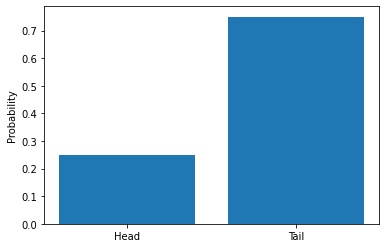

In [10]:
bcoin.plot()

**Let's throw the biased coin 100 times:**

In [11]:
sample = bcoin.random(100)
print(sample)

('Head', 'Tail', 'Tail', 'Tail', 'Tail', 'Tail', 'Tail', 'Tail', 'Head', 'Tail', 'Tail', 'Head', 'Tail', 'Tail', 'Head', 'Head', 'Tail', 'Tail', 'Head', 'Tail', 'Tail', 'Tail', 'Tail', 'Tail', 'Head', 'Head', 'Tail', 'Tail', 'Tail', 'Tail', 'Tail', 'Head', 'Head', 'Tail', 'Head', 'Head', 'Tail', 'Tail', 'Head', 'Tail', 'Tail', 'Tail', 'Head', 'Head', 'Tail', 'Tail', 'Tail', 'Tail', 'Tail', 'Head', 'Head', 'Tail', 'Tail', 'Tail', 'Tail', 'Head', 'Tail', 'Tail', 'Tail', 'Head', 'Tail', 'Tail', 'Head', 'Tail', 'Head', 'Tail', 'Tail', 'Head', 'Tail', 'Tail', 'Tail', 'Head', 'Tail', 'Tail', 'Head', 'Tail', 'Tail', 'Head', 'Tail', 'Head', 'Head', 'Head', 'Tail', 'Head', 'Tail', 'Tail', 'Tail', 'Tail', 'Head', 'Head', 'Tail', 'Tail', 'Tail', 'Tail', 'Head', 'Head', 'Tail', 'Head', 'Head', 'Tail')


**Q**: How can I check that frequencies follow the probabilities of the biased coin?<br>
**A**: Use Lea!

In [12]:
lea.vals(*sample)

Head :  7/20
Tail : 13/20

**You may also apply transformations on Lea instances:**<br>
Python's indexing and method calls are transferred to inner values.

In [13]:
bcoin[0]

H : 1/4
T : 3/4

In [14]:
bcoin[0].lower()

h : 1/4
t : 3/4

In [15]:
bcoin.map(len)

4 : 1

... and Python's `+` `-` `*` `/` `<` `<=`... operators are overloaded:

In [16]:
"This is " + bcoin + "!"

This is Head! : 1/4
This is Tail! : 3/4

In [17]:
die = lea.vals(1,2,3,4,5,6)
die * bcoin

Head                     : 1/24
HeadHead                 : 1/24
HeadHeadHead             : 1/24
HeadHeadHeadHead         : 1/24
HeadHeadHeadHeadHead     : 1/24
HeadHeadHeadHeadHeadHead : 1/24
Tail                     : 3/24
TailTail                 : 3/24
TailTailTail             : 3/24
TailTailTailTail         : 3/24
TailTailTailTailTail     : 3/24
TailTailTailTailTailTail : 3/24

**Let's throw now *two* biased coins:**' <img src="coin.png"/><img src="coin.png"/><br>
`x.new(n)` creates `n` independent events, clones of `x` (same probability distribution):

In [18]:
bcoin1, bcoin2 = bcoin.new(2)

In [19]:
bcoins = bcoin1 + " " + bcoin2
bcoins

Head Head : 1/16
Head Tail : 3/16
Tail Head : 3/16
Tail Tail : 9/16

**Conditional probability $P(A|B)$: `A.given(B)`**

In [20]:
bcoins.given(bcoin1=="Tail")

Tail Head : 1/4
Tail Tail : 3/4

Note: `bcoins` is dependent of `bcoin1` and `bcoin2`.<br>
<center><img src="bcoins.png"/></center>

Lea does ***lazy evaluation*** (see "*referential consistency*", in [Statues algorithm's arXiv paper](https://arxiv.org/abs/1806.09997)) 

**Lea handles also Boolean events and associated operators `&` (AND) `|` (OR) `~` (NOT):**

In [21]:
to_be = lea.event('41/42')
to_be

False :  1/42
True  : 41/42

In [22]:
to_be | ~to_be

True : 1

Note: Lea's `P` function allows extracting the probability of `True`.

In [23]:
from lea import P
P(to_be)

41/42

## Some funny puzzles

### One Ace in three throws 
<center><img src="TheDoctrineOfChance.png"/></center>

**<p style="text-align: center;">from "The Doctrine of Chance", by A. de Moivre, 1718</p>**

In [24]:
d1, d2, d3 = lea.vals(1,2,3,4,5,6).new(3)
P((d1==1) | (d2==1) | (d3==1))

91/216

### Dwarf vs cave troll (RPG Combat)
<center><img src="Drong_M01.jpg"/><img src="gw-99060209197.jpg"/></center>

***<p style="text-align: center;">... Then, Bashful the dwarf strikes the cave troll with his magic axe. Eeeeh-aaaaaah!</p>***

In [25]:
lea.set_prob_type("f")
lea.set_display_options(kind='%', nb_decimals=2)

In [26]:
D6 = lea.interval(1, 6)
D20 = lea.interval(1, 20)

**Bashful's attack roll is D20+4. The troll is hit if this roll is greater than troll's armor class, which is 18.**

In [27]:
attack_roll = D20.new() + 4
troll_armor_class = 18
hit = attack_roll >= troll_armor_class
print (f"Probability that Bashful hits the troll: {(P(hit))}")

Probability that Bashful hits the troll: 35.00 %


**The damage of the magic axe is 2D6+5...**

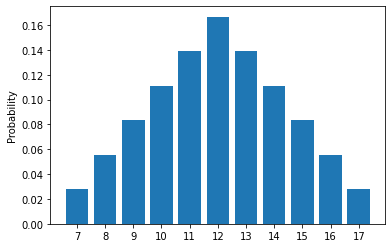

In [28]:
damage_if_hit = D6.times(2) + 5
damage_if_hit.plot()

**...but this applies only if the hit succeeds:**

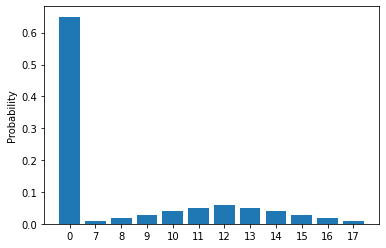

In [29]:
damage = lea.if_(hit, damage_if_hit, 0)
damage.plot()

**Assuming that the troll has 20 health points remaining, what's the probability to kill him in four rounds or less.**

In [30]:
troll_hp = 20
P(troll_hp - damage.times(4) <= 0)

40.68 %

See also [**Dice Tools**](https://github.com/hindsm38/dice_tools), a Python package using Lea dedicated to dice based tabletop games.

In [31]:
lea.set_prob_type('r')
lea.set_display_options(kind='/')

### The intransitive dice 
<center><img src="Intransitive_dice.png"/></center>

* The RED die has sides 2, 2, 4, 4, 9, 9.
* The GREEN die has sides 1, 1, 6, 6, 8, 8.
* The BLUE die has sides 3, 3, 5, 5, 7, 7.


In [32]:
red_die   = lea.vals(2, 2, 4, 4, 9, 9)
green_die = lea.vals(1, 1, 6, 6, 8, 8)
blue_die  = lea.vals(3, 3, 5, 5, 7, 7)

 What are the means of these dice?

In [33]:
[die.mean() for die in (red_die, green_die, blue_die)]

[5.0, 5.0, 5.0]

OK, the three dice have the same means. But...

In [34]:
f"The RED die beats the GREEN die with prob. {P(red_die > green_die)}."

'The RED die beats the GREEN die with prob. 5/9.'

In [35]:
f"The GREEN die beats the BLUE die with prob. {P(green_die > blue_die)}."

'The GREEN die beats the BLUE die with prob. 5/9.'

In [36]:
f"The BLUE die beats the RED die with prob. {P(blue_die > red_die)}."

'The BLUE die beats the RED die with prob. 5/9.'

These probabilities can be checked using the `joint` function:

In [37]:
lea.joint(red_die, green_die, red_die>green_die)

(2, 1, True ) : 1/9
(2, 6, False) : 1/9
(2, 8, False) : 1/9
(4, 1, True ) : 1/9
(4, 6, False) : 1/9
(4, 8, False) : 1/9
(9, 1, True ) : 1/9
(9, 6, True ) : 1/9
(9, 8, True ) : 1/9

In [38]:
lea.joint(green_die, blue_die, green_die>blue_die)

(1, 3, False) : 1/9
(1, 5, False) : 1/9
(1, 7, False) : 1/9
(6, 3, True ) : 1/9
(6, 5, True ) : 1/9
(6, 7, False) : 1/9
(8, 3, True ) : 1/9
(8, 5, True ) : 1/9
(8, 7, True ) : 1/9

In [39]:
lea.joint(blue_die, red_die, blue_die>red_die)

(3, 2, True ) : 1/9
(3, 4, False) : 1/9
(3, 9, False) : 1/9
(5, 2, True ) : 1/9
(5, 4, True ) : 1/9
(5, 9, False) : 1/9
(7, 2, True ) : 1/9
(7, 4, True ) : 1/9
(7, 9, False) : 1/9

### Boys or girls paradox
<center><img src="boy_and_girl.jpg"/></center>

See [Boy or girl paradox on Wikipedia](https://en.wikipedia.org/wiki/https://en.wikipedia.org/wiki/Boy_or_girl_paradox).

---
***The chances to be boy or girl are even.***

---

In [40]:
child = lea.vals('boy', 'girl')
child

boy  : 1/2
girl : 1/2

---
***Mr. Smith has two children. At least one of them is a boy.<br>
What is the probability that both children are boys?***

---

In [41]:
children = lea.joint(child.new(), child.new())
nb_boys = children.count('boy')
P((nb_boys == 2).given(nb_boys >= 1))

1/3

Explanation:

In [42]:
lea.joint(children[0], children[1], nb_boys).given(nb_boys >= 1)

('boy' , 'boy' , 2) : 1/3
('boy' , 'girl', 1) : 1/3
('girl', 'boy' , 1) : 1/3

---
***Mrs. White has seven children. The eldest is a boy and he's got three brothers at least.<br>
What is the probability that all children are boys?***

---

In [43]:
children = lea.joint(*child.new(7))
eldest = children[0]
nb_boys = children.count('boy')
P((nb_boys == 7).given(eldest == 'boy', nb_boys >= 4))

1/42

Explanation:

In [44]:
lea.joint(children, nb_boys).given(eldest == 'boy', nb_boys >= 4)

(('boy', 'boy', 'boy', 'boy', 'boy', 'boy', 'boy')   , 7) : 1/42
(('boy', 'boy', 'boy', 'boy', 'boy', 'boy', 'girl')  , 6) : 1/42
(('boy', 'boy', 'boy', 'boy', 'boy', 'girl', 'boy')  , 6) : 1/42
(('boy', 'boy', 'boy', 'boy', 'boy', 'girl', 'girl') , 5) : 1/42
(('boy', 'boy', 'boy', 'boy', 'girl', 'boy', 'boy')  , 6) : 1/42
(('boy', 'boy', 'boy', 'boy', 'girl', 'boy', 'girl') , 5) : 1/42
(('boy', 'boy', 'boy', 'boy', 'girl', 'girl', 'boy') , 5) : 1/42
(('boy', 'boy', 'boy', 'boy', 'girl', 'girl', 'girl'), 4) : 1/42
(('boy', 'boy', 'boy', 'girl', 'boy', 'boy', 'boy')  , 6) : 1/42
(('boy', 'boy', 'boy', 'girl', 'boy', 'boy', 'girl') , 5) : 1/42
(('boy', 'boy', 'boy', 'girl', 'boy', 'girl', 'boy') , 5) : 1/42
(('boy', 'boy', 'boy', 'girl', 'boy', 'girl', 'girl'), 4) : 1/42
(('boy', 'boy', 'boy', 'girl', 'girl', 'boy', 'boy') , 5) : 1/42
(('boy', 'boy', 'boy', 'girl', 'girl', 'boy', 'girl'), 4) : 1/42
(('boy', 'boy', 'boy', 'girl', 'girl', 'girl', 'boy'), 4) : 1/42
(('boy', 'boy', 'girl', '

### The Monty Hall problem
<center><img src="Monty_open_door.png"/></center>

See [Monty Hall problem on Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem).

***Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?***

In [45]:
door = "door " + lea.vals(*"123")
prize = door.new()
choice1 = door.new()
goat = door.such_that(door != choice1, door != prize)
lea.joint(prize, choice1, goat)

('door 1', 'door 1', 'door 2') : 1/18
('door 1', 'door 1', 'door 3') : 1/18
('door 1', 'door 2', 'door 3') : 2/18
('door 1', 'door 3', 'door 2') : 2/18
('door 2', 'door 1', 'door 3') : 2/18
('door 2', 'door 2', 'door 1') : 1/18
('door 2', 'door 2', 'door 3') : 1/18
('door 2', 'door 3', 'door 1') : 2/18
('door 3', 'door 1', 'door 2') : 2/18
('door 3', 'door 2', 'door 1') : 2/18
('door 3', 'door 3', 'door 1') : 1/18
('door 3', 'door 3', 'door 2') : 1/18

**What if I keep my initial choice?**

In [46]:
P(choice1 == prize)

1/3

**What if I change my choice?**

In [47]:
choice2 = door.such_that(door != choice1, door != goat)
P(choice2 == prize)

2/3

Explanation:

In [48]:
lea.joint(prize, choice1, goat, choice2, choice2==prize).given(choice1=="door 1")

('door 1', 'door 1', 'door 2', 'door 3', False) : 1/6
('door 1', 'door 1', 'door 3', 'door 2', False) : 1/6
('door 2', 'door 1', 'door 3', 'door 2', True ) : 2/6
('door 3', 'door 1', 'door 2', 'door 3', True ) : 2/6

## Who's the (most probable) killer?

Few configuration to have one-line / percentage display...

In [49]:
import lea
from lea import P, pmf, if_, event
lea.set_prob_type("x")
lea.set_display_options(kind="%", nb_decimals=2, one_line=True)

**Let's define first the *prior* probabilities to be the killer:**

|![](ColMustard.jpg)     | ![](MrsPeacock.jpg) | ![](MrsWhite.jpg) | ![Plum](ProfPlum.jpg) |
|:------------------------:|:---------------------:|:-------------------:|:-----------------------:|
| Colonel Mustard: **40%**  | Mrs. Peacock: **25%**   | Mrs. White: **10%**   | Professor Plum: **25%**   |


In [50]:
killer = pmf({ "Col. Mustard": '40 %',
               "Mrs. Peacock": '25 %',
               "Mrs. White"  : '10 %',
               "Prof. Plum"  : '25 %' })
killer

{ Col. Mustard:  40.00 %, Mrs. Peacock:  25.00 %, Mrs. White:  10.00 %, Prof. Plum:  25.00 % }

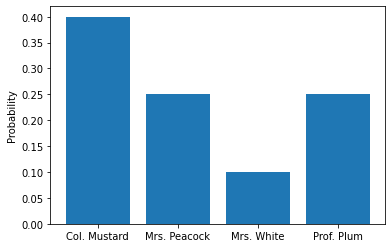

In [51]:
killer.plot()

Now, let's write down the information provided by Sigmund-the-profiler...

> ***if** Mrs. White is the killer, <br> 
**then** she'll be absent with prob. 95 %,<br>
**otherwise** she'll be absent with prob. 20 %*

In [52]:
mrs_white_is_absent = if_( killer == "Mrs. White",
                           event('95 %'),
                           event('20 %'))
P(mrs_white_is_absent)

27.50 %

> ***if** Mrs. Peacock is innocent,<br>
**then** she knows who's the killer with prob. 75 %*

In [53]:
mrs_peacock_knows_killer = if_( killer != "Mrs. Peacock",
                                event(' 75 %'),
                                event('100 %') )
P(mrs_peacock_knows_killer)

81.25 %

> ***if** Mrs. Peacock is the killer **or if** she knows who’s the killer<br>
**then** she'll be drunk with prob. 50 %,<br>
**otherwise** she'll be drunk with prob. 10 %*

In [54]:
mrs_peacock_is_drunk = if_( (killer == "Mrs. Peacock") | mrs_peacock_knows_killer,
                            event('50 %'),
                            event('10 %'))
P(mrs_peacock_is_drunk)

42.50 %

> ***if** Col. Mustard is the killer, <br> 
**then** Prof. Plum will accuse him with prob. 75 %,<br>
**otherwise** Prof. Plum will accuse him with prob. 5 %*

In [55]:
prof_plum_accuses_col_mustard = if_( killer == "Col. Mustard",
                                     event("75 %"),
                                     event(" 5 %"))
P(prof_plum_accuses_col_mustard)

33.00 %

Side note: what we have a done here is a ***Bayesian network***!
<center><img src="killer_bn.png"/></center>

**Police investigation, day #1**

The day after the murder, all four suspects are called to be questioned...

In [56]:
evidences = []
killer.given(*evidences)

{ Col. Mustard:  40.00 %, Mrs. Peacock:  25.00 %, Mrs. White:  10.00 %, Prof. Plum:  25.00 % }

**+ EVIDENCE 1: Mrs. White is absent.**

In [57]:
evidences.append(mrs_white_is_absent)
killer.given(*evidences)

{ Col. Mustard:  29.09 %, Mrs. Peacock:  18.18 %, Mrs. White:  34.55 %, Prof. Plum:  18.18 % }

**+ EVIDENCE 2: Mrs. Peacock is drunk.**

In [58]:
evidences.append(mrs_peacock_is_drunk)
killer.given(*evidences)

{ Col. Mustard:  27.83 %, Mrs. Peacock:  21.74 %, Mrs. White:  33.04 %, Prof. Plum:  17.39 % }

**+ EVIDENCE 3: Prof. Plum accuses Col. Mustard.**

In [59]:
evidences.append(prof_plum_accuses_col_mustard)
killer.given(*evidences)

{ Col. Mustard:  85.26 %, Mrs. Peacock:   4.44 %, Mrs. White:   6.75 %, Prof. Plum:   3.55 % }

**+ EVIDENCE 4: The killer is a woman.**

In [60]:
killer_is_woman = killer.startswith("Mrs.")
evidences.append(killer_is_woman)
killer.given(*evidences)

{ Mrs. Peacock:  39.68 %, Mrs. White:  60.32 % }

In [61]:
P((killer == "Mrs. Peacock").given(*evidences))

39.68 %

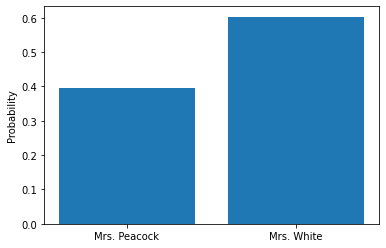

In [62]:
killer.given(*evidences).plot()

**Conclusions**<br>
OK. This is just a game... but probabilities can play a decisive role in forensic science!<br>
There are notable examples of *flaws*, notoriously the [**Dreyfus affair**](https://en.wikipedia.org/wiki/Dreyfus_affair) (1894) and the [**Sally Clark case**](https://en.wikipedia.org/wiki/Sally_Clark) (1998).<br>
See also the [***"prosecutor's fallacy"***](https://en.wikipedia.org/wiki/Base_rate_fallacy).

## Symbolic calculation
If you have [SymPy](https://www.sympy.org/) installed, you may change any probability by a variable name.<br> 
For instance, for prior probabilities:

In [63]:
lea.set_display_options(one_line=False)

In [64]:
killer = pmf({ "Col. Mustard": 'm',
               "Mrs. Peacock": 'p',
               "Mrs. White"  : 'w',
               "Prof. Plum"  : None })
killer

Col. Mustard : m
Mrs. Peacock : p
Mrs. White   : w
Prof. Plum   : -m - p - w + 1

...then, redo the definition of previous rules and evidences. You'll get results as probability formulae!

**Another example:**

**The probablity of win is $p$ at each trial. How many wins after 5 trials?**

In [65]:
nb_wins = lea.binom(5, 'p')
nb_wins

0 : -(p - 1)**5
1 : 5*p*(p - 1)**4
2 : -10*p**2*(p - 1)**3
3 : 10*p**3*(p - 1)**2
4 : 5*p**4*(1 - p)
5 : p**5

In [66]:
nb_wins.assign(p=0.2)

0 :  32.77 %
1 :  40.96 %
2 :  20.48 %
3 :   5.12 %
4 :   0.64 %
5 :   0.03 %

**Given that we win at least one time, what's the probability that to win at least 3 times?**

In [67]:
P((nb_wins >= 3).given(nb_wins >= 1))

p**2*(6*p**2 - 15*p + 10)/(p**4 - 5*p**3 + 10*p**2 - 10*p + 5)

## A bullshit generator
<center><img src="bullshit.jpg"/></center>

Lea is used her for choosing random words and grammar rules.<br>
The most complex rules are less likely than simplest ones.

In [68]:
# --- to hear the sentences (optional) ---
# !pip install pyttsx3

In [69]:
# ======================================================================
# Bullshit Generator 
#   by Pierre Denis, March 2009, 2014, 2024
# ======================================================================

# --------------------------------------------------
# grammar engine
# --------------------------------------------------

import lea

class Node(object):

    def set_terms_choices(self,*termsChoices):
        self.terms_choices = lea.pmf(termsChoices)
        
    def gen_words(self):
        terms = self.terms_choices.random()
        for term in terms:
            if isinstance(term, str):
                yield term
            else:
                for word in term.gen_words():
                    yield word

    def get_string(self):
        res = " ".join(self.gen_words())
        res = ", ".join(w.strip() for w in res.split(",") if w.strip())
        if res.endswith(", "):
            res = res[:-2]
        return res[0].upper() + res[1:] + "."


class TerminalNode(object):

    def __init__(self,*words):
        self.words = lea.vals(*words)

    def gen_words(self):
        yield self.words.random()

# --------------------------------------------------
# grammar
# --------------------------------------------------

verb = TerminalNode(
    "accesses", "activates", "administrates", "aggregates", "builds", "calculates", "calls", "checks",
    "cleans up", "competes with", "completes", "complies with", "consumes", "controls", "covers",
    "creates", "declares", "delivers", "dispatches", "eases", "encapsulates", "encompasses",
    "executes", "extracts", "features", "generates", "gets", "gets", "gets", "governs", "guides",
    "has", "has", "has", "increases", "inherits from", "is", "is", "is", "keeps track of",
    "leverages", "lies in", "makes", "manages", "maximizes", "mitigates", "monitors", "must have",
    "needs", "negociates", "offers", "opens", "operates on", "optimizes", "orchestrates",
    "overwrites", "performs", "populates", "precludes", "promotes", "provides", "provides",
    "reads", "recalls", "receives", "reduces", "registers", "regulates", "relies on", "removes",
    "requests", "requires", "resides on", "resides within", "retrieves", "retrieves the data in",
    "runs", "runs on", "schedules", "integrates with", "sends", "shall be", "shall have", "should be",
    "should have", "starts", "stores", "streamlines", "subscribes to", "supersedes", "takes",
    "targets", "triggers", "updates", "validates", "writes")

passive_verb = TerminalNode(
    "accessed by", "achieved by", "aggregated by", "applicable for", "asserted by", "authorized by",
    "based upon", "built from", "built upon", "cleaned by", "collected by", "consumed",
    "contained in", "controlled by", "dedicated to", "deployed on", "deleted by", "derived from",
    "dispatched by", "driven by", "eased by", "enabled by", "encapsulated by", "envisioned in",
    "extracted from", "generated by", "in the scope of", "installed on", "integrated in",
    "interfaced by", "located in", "managed by", "maximized by", "monitored by", "opened by",
    "optimized by", "orchestrated by", "packaged in", "performed by", "populated by", "processed by",
    "provided by", "provided from", "received by", "recycled by", "refreshed by", "registered in",
    "removed by", "removed from", "requested by", "related to", "required by", "responsible for",
    "scheduled by", "sent to", "serialized by", "serialized in", "started in", "stored by",
    "stored in", "stored on", "subscribed by", "updated by", "validated by", "written by")

a_simple_name = TerminalNode(
    "COTS", "GRID processing", "Java program", "LDAP registry", "Portal", "RSS feed", "SAML token",
    "SOAP message", "SSO", "TCP/IP", "UDDI", "UML model", "URL", "W3C", "Web", "Web 2.0",
    "Web browser", "Web page", "Web service", "back-end", "backbone", "backend", "bandwidth", "bean",
    "box", "bridge", "browser", "bus", "business", "business model", "call", "catalogue", "class",
    "client", "cluster", "collection", "communication", "component", "compression", "computer",
    "concept", "conceptualization", "connection", "console", "content", "context", "control",
    "controller", "cookie", "copy", "customization", "data", "database", "dataset", "datastore",
    "deployment", "derivation", "design", "development", "device", "directory", "discovery",
    "dispatcher", "disruption", "document", "domain", "factory", "fat client", "feature", "file",
    "footprint", "form", "frame", "framework", "frontend", "function", "gateway", "genericity",
    "geomanagement", "goal", "governance", "granularity", "guideline", "header", "key", "layer",
    "leader", "library", "link", "list", "log file", "logic", "look-and-feel", "manager", "market",
    "mechanism", "memory", "message", "meta-model", "metadata", "model", "modeling", "module",
    "name", "network", "package", "packaging", "parallelism", "performance", "persistence",
    "personalization", "plug-in", "policy", "port", "portal", "practice", "presentation layer",
    "printer", "privacy", "private key", "procedure", "process", "processor", "processing",
    "product", "protocol", "provider", "recommendation", "registration", "registry", "relationship",
    "request", "resource", "responsibility", "role", "rule", "scenario", "scheduler", "schema",
    "security", "sequence", "server", "service", "service provider", "servlet", "session",
    "skeleton", "software", "solution", "source", "space", "specification", "suite", "signal",
    "slot", "standard", "state", "statement", "streaming", "style sheet", "subscriber", "subsystem",
    "system", "system", "table", "target", "task", "taxonomy", "technique", "technology", "template",
    "thin client", "thread", "throughput", "time", "timing", "token", "tool", "toolkit", "topic",
    "unit", "usage", "use case", "user", "user experience", "validation", "value", "version",
    "vision", "warehouse", "work", "workflow", "zone")

an_simple_name = TerminalNode(
    "API", "IP address", "Internet", "XML", "abstraction", "access", "acknowledgment", "action",
    "actor", "administrator", "aggregator", "algorithm", "allowance", "appliance", "application",
    "approach", "architecture", "area", "artifact", "aspect", "authentication", "automation",
    "availability", "encapsulation", "end-point", "engine", "entity", "environment", "event",
    "identifier", "image", "information", "instance", "instantiation", "integration", "interface",
    "interoperability", "issuer", "object", "ontology", "operation", "operator", "opportunity",
    "option", "orchestration", "order", "owner")

a_adjective = TerminalNode(
    "BPEL",  "DOM", "DTD", "GRID", "HTML", "J2EE", "Java", "Java-based", "UML", "SAX", "WFS", "WSDL",
    "basic", "broad", "bug-free", "business-driven", "client-side", "coarse", "coherent",
    "compatible", "complete", "compliant", "comprehensive", "conceptual", "consistent", "continuous", 
    "cost-effective", "custom", "data-driven", "dedicated", "design", "disruptive", "distributed",
    "dynamic", "encrypted", "event-driven", "fine-grained", "first-class", "form", "formal", "free",
    "full", "generic", "geo-referenced", "global", "global", "graphical", "hard", "high-resolution",
    "high-level", "individual", "invulnerable", "just-in-time", "key", "layered", "leading",
    "lightweight", "limited", "local", "logical", "machine", "main", "major", "message-based",
    "most important", "multi-tiers", "narrow", "native", "next", "next-generation", "normal",
    "operational", "parallel", "password-protected", "peer-to-peer", "performant", "periodic",
    "physical", "point-to-point", "polymorphic","portable", "primary", "prime", "private", "proven",
    "public", "raw", "real-time", "registered", "relational", "reliable", "remote", "respective",
    "right", "robust", "rule-based", "scalable", "seamless", "secondary", "semantic", "serial",
    "server-side", "service-based", "service-oriented", "simple", "sole", "specific", "sporadic",
    "standard", "state-of-the-art", "stateless", "storage", "sufficient", "technical", "thread-safe",
    "time-based", "uniform", "unique", "used", "useful", "user-friendly", "virtual", "visual",
    "Web-based", "web-centric", "well-documented", "wireless", "world-leading", "zero-default")

an_adjective = TerminalNode(
    "AJAX", "OO", "XML-based", "abstract", "agnostic", "ancillary", "asynchronous",
    "authenticated", "authorized", "auto-regulated", "automated", "automatic", "available", "aware",
    "efficient", "event-based", "integrated", "international", "interoperable", "off-line",
    "off-the-shelf", "official", "online", "open", "operational", "other", "own", "unaffected",
    "unlimited", "up-to-date")

adverb = TerminalNode(
    "basically", "comprehensively", "conceptually", "consistently", "definitely", "dramatically",
    "dynamically", "expectedly", "fully", "generally", "generically", "globally", "greatly",
    "individually", "locally", "logically", "mainly", "mostly", "natively", "officially", "often",
    "periodically", "physically", "practically", "primarily", "repeatedly", "roughly", "sequentially",
    "simply", "specifically", "surely", "technically", "undoubtly", "usefully", "virtually")
                            
sentenceHead = TerminalNode(
    "actually", "as a matter of fact", "as said before", "as stated before", "basically",
    "before all", "besides this", "beyond that point", "clearly", "conversely", "despite these facts",
    "for this reason", "generally speaking", "if needed", "in essence", "in other words",
    "in our opinion", "in the long term", "in the short term", "in this case", "incidentally",
    "moreover", "nevertheless", "now", "otherwise", "periodically", "roughly speaking",
    "that being said", "then", "therefore", "to summarize", "up to here", "up to now",
    "when this happens")

(name, a_name, an_name, name_tail, adjective, name_group,
 simple_name_group, verbal_group, simple_verbal_group, sentence,
 sentence_tail) = [Node() for i in range(11)]

a_name.set_terms_choices(
    (( a_simple_name,      ), 50 ),
    (( a_simple_name, name ),  8 ),
    (( a_name, name_tail   ),  5 ))

an_name.set_terms_choices(
    (( an_simple_name,      ), 50 ),
    (( an_simple_name, name ),  8 ),
    (( an_name, name_tail   ),  5 ))

name_tail.set_terms_choices(
    (( "of", name_group        ), 8 ),
    (( "from", name_group      ), 8 ),
    (( "above", name_group     ), 1 ),
    (( "after", name_group     ), 1 ),
    (( "against", name_group   ), 1 ),
    (( "before", name_group    ), 1 ),
    (( "behind", name_group    ), 1 ),
    (( "below", name_group     ), 1 ),
    (( "on top of", name_group ), 1 ),
    (( "under", name_group     ), 1 ))

name.set_terms_choices(
    (( a_name,  ), 1 ),
    (( an_name, ), 1 ))

adjective.set_terms_choices(
    (( a_adjective,  ), 1 ),
    (( an_adjective, ), 1 ))

name_group.set_terms_choices(
    (( simple_name_group,                                     ), 14 ),
    (( simple_name_group, passive_verb, name_group            ),  3 ),
    (( simple_name_group, "that", simple_verbal_group         ),  2 ),
    (( simple_name_group, ", which", simple_verbal_group, "," ),  1 ))

simple_name_group.set_terms_choices(
    (( "the", name              ), 40 ),
    (( "the", adjective, name   ), 20 ),
    (( "a", a_name              ), 10 ),
    (( "an", an_name            ), 10 ),
    (( "a", a_adjective, name   ),  5 ),                
    (( "an", an_adjective, name ),  5 ))  

verbal_group.set_terms_choices(
    (( verb, name_group                       ), 10 ),
    (( adverb, verb, name_group               ),  1 ),
    (( "is", passive_verb, name_group         ),  4 ),
    (( "is", adverb, passive_verb, name_group ),  1 ),
    (( "is", adjective                        ),  1 ),
    (( "is", adverb, adjective                ),  1 ))

simple_verbal_group.set_terms_choices(
    (( verb, simple_name_group ), 2 ),
    (( "is", adjective         ), 1 ))

sentence.set_terms_choices(
    (( name_group, verbal_group                     ), 20 ),
    (( sentenceHead, "," , name_group, verbal_group ),  4 ),
    (( sentence, sentence_tail                      ),  4 ))

sentence_tail.set_terms_choices(
    (( "in", name_group                  ), 12 ),
    (( "within", name_group              ),  5 ),
    (( "where", name_group, verbal_group ),  5 ),
    (( "when", name_group, verbal_group  ),  5 ),
    (( "because it", verbal_group        ),  2 ),
    (( "; that's why it", verbal_group   ),  1 ))

# --------------------------------------------------
# main program
# --------------------------------------------------
try:
    import pyttsx3
    from pyttsx3 import speak
    engine = pyttsx3.init()
    engine.setProperty('rate', 120)
except ImportError:
    def speak(sentence):
        pass
try:
    from IPython.display import display, Markdown
    def show(sentence):
        display(Markdown(f'<span style="font-size:20px">{sentence}</span>'))
except ImportError:
    show = print
from random import seed
seed(666)
while True:
    print ("")
    for i in range(1):
        generated_sentence = sentence.get_string()
        show(generated_sentence)
        speak(generated_sentence)
    #print("\n")
    cmd = input("Press enter if you want that I continue. Press 'q', then enter to stop.")
    if cmd.strip().lower() == "q":
        break

<span style="font-size:20px">The entity object that promotes a world-leading request behind the relational order that precludes the Internet is sent to the automation.</span>

Press enter if you want that I continue. Press 'q', then enter to stop. q


## Q & A

In [70]:
lea.vals("Any", "No", "Why do you") + " question?"

Any question?        :  33.33 %
No question?         :  33.33 %
Why do you question? :  33.33 %

## Links

|                          | URL                                      |
| ------------------------ | -----------------------------------------|
| Lea Git repo             | https://bitbucket.org/piedenis/lea       |
| Lea Tutorial             | https://bitbucket.org/piedenis/lea/wiki  |
| present Jupyter notebook | https://github.com/piedenis/lea_showroom |
| contact                  | pie.denis@skynet.be                      |
|                          | English / French spoken!                 |
